# Download dataset

In [242]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [243]:
df_train=pd.read_excel('Flight Prediction/Data_Train.xlsx')

In [244]:
df_test=pd.read_excel('Flight Prediction/Test_set.xlsx')

In [245]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [246]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [247]:
df=pd.concat([df_train,df_test],axis=0)

In [248]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [250]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

# Fill the missing values

In [251]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [252]:
df1=df[df['Source']=='Delhi']

In [253]:
df2=df1[df1['Destination']=='Cochin']

In [254]:
df2[df2['Airline']=='Air India']['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [255]:
df['Route']=df['Route'].fillna(df2[df2['Airline']=='Air India']['Route'].mode()[0])

In [256]:
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,DEL → BOM → COK,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [257]:
df['Total_Stops']=df['Total_Stops'].fillna('1 stop')

In [258]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [259]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


# Does Price vary with Airlines?

For these keep the Source and Destination constant(I have taken Source=Delhi and Destination=Cochin)

In [260]:
df_dc=df_train[(df_train['Source']=='Delhi') &(df_train['Destination']=='Cochin')]

In [261]:
df_dc.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
16,SpiceJet,15/04/2019,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No info,5830


C:\Users\undav\AppData\Local\Temp/ipykernel_21776/1479190728.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labels=df_dc['Airline'],rotation=90)


<Axes:xlabel='Airline', ylabel='Price'>

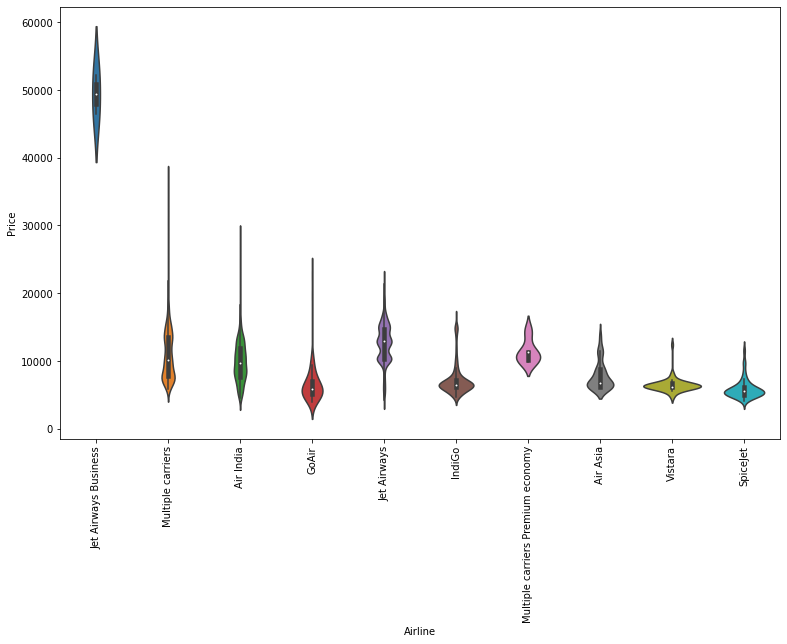

In [262]:
fig=plt.figure(figsize=(10,6))
axes=fig.add_axes([0,0,1,1])
axes.set_xticklabels(labels=df_dc['Airline'],rotation=90)
sns.violinplot(x='Airline',y='Price',data=df_dc.sort_values(by='Price',ascending=False))

There are slight differences between each companies on this graph,Spicejet seems to have cheaper price and Jet Airways is expensive. This implies Price vary with Airlines

# Doe the number of stops influence the price?

C:\Users\undav\AppData\Local\Temp/ipykernel_21776/813191660.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labels=df_dc['Airline'],rotation=90)


<Axes:xlabel='Airline', ylabel='Price'>

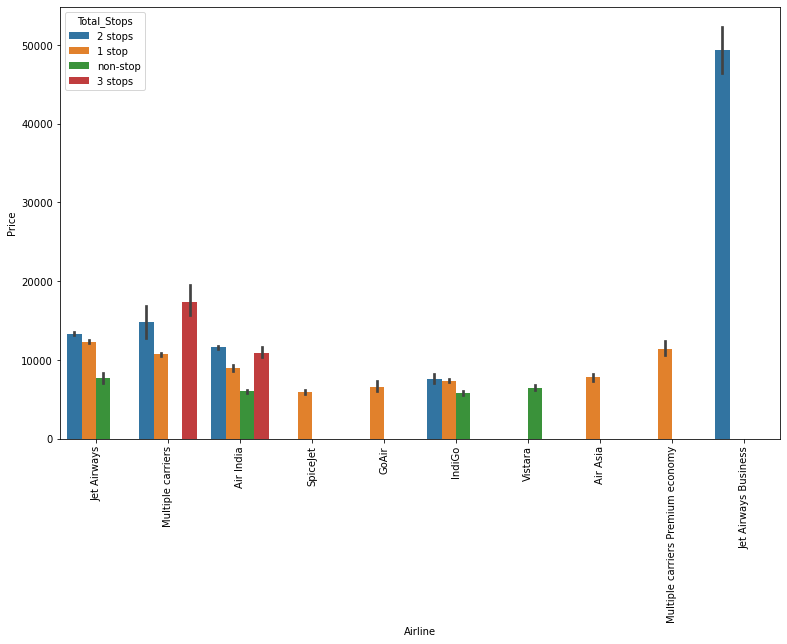

In [263]:
fig=plt.figure(figsize=(10,6))
axes=fig.add_axes([0,0,1,1])
axes.set_xticklabels(labels=df_dc['Airline'],rotation=90)
sns.barplot(x='Airline',y='Price',data=df_dc,hue='Total_Stops',estimator=np.mean)

It is clear that the more stops there are the more expensive the flight in each Airline

# Splitting the Date_of_Journey column in to the date,month,year

In [264]:
df['Date_of_Journey'].apply(lambda x:x.split('/')).reset_index()

,index,Date_of_Journey
0,0,"[24, 03, 2019]"
1,1,"[1, 05, 2019]"
2,2,"[9, 06, 2019]"
3,3,"[12, 05, 2019]"
4,4,"[01, 03, 2019]"
...,...,...
13349,2666,"[6, 06, 2019]"
13350,2667,"[27, 03, 2019]"
13351,2668,"[6, 03, 2019]"
13352,2669,"[6, 03, 2019]"


In [265]:
df['date']=df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
df['month']=df['Date_of_Journey'].apply(lambda x:x.split('/')[1])
df['year']=df['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13354 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13354 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  date             13354 non-null  object 
 12  month            13354 non-null  object 
 13  year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


we have to convert date,month,year into integer type

In [267]:
df['date']=df['date'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13354 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13354 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  date             13354 non-null  int32  
 12  month            13354 non-null  int32  
 13  year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


 And now drop 'Date_of_Journey' coloumn

In [269]:
 
df.drop('Date_of_Journey',axis=1,inplace=True)

In [270]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


# Splitting of Arrival time in to hours and minutes

In [271]:

df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [272]:
df['Arrival_Time']

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [273]:
df['Arr_hr']=df['Arrival_Time'].apply(lambda x:x.split(':')[0])
df['Arr_mi']=df['Arrival_Time'].apply(lambda x:x.split(':')[1])
df['Arr_hr']=df['Arr_hr'].astype(int)
df['Arr_mi']=df['Arr_mi'].astype(int)

Drop Arrival_Time from the table

In [274]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [275]:
df['Arr_mi']

0       10
1       15
2       25
3       30
4       35
        ..
2666    25
2667    55
2668    25
2669    15
2670    15
Name: Arr_mi, Length: 13354, dtype: int32

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13354 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13354 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   date             13354 non-null  int32  
 10  month            13354 non-null  int32  
 11  year             13354 non-null  int32  
 12  Arr_hr           13354 non-null  int32  
 13  Arr_mi           13354 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.3+ MB


In [277]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arr_hr,Arr_mi
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


# Splitting Dep_Time in to Dep_hr and Dep_min

In [278]:

df['Dep_hr']=df['Dep_Time'].apply(lambda x:x.split(':')[0]).astype(int)

In [279]:
df['Dep_min']=df['Dep_Time'].apply(lambda x:x.split(':')[1]).astype(int)

In [280]:
df.drop('Dep_Time',axis=1,inplace=True)

# Conversion of Duration in to completely in to minutes duration

In [281]:

df[df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arr_hr,Arr_mi,Dep_hr,Dep_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327.0,6,3,2019,16,55,16,50
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,NaN,12,3,2019,16,55,16,50


We can see that duration is 5minutes which is not possible.so,we can remove those rows from the dataset.

In [282]:
df.drop(df[df['Duration']=='5m'].index,axis=0,inplace=True)

In [283]:
df['Dur_hr']=df['Duration'].str.split(' ').str[0]

In [284]:
df['Dur_hr']=df['Dur_hr'].str.split('h').str[0].astype(int)

In [285]:
df['Dur_min']=df['Duration'].str.split(' ').str[1]

In [286]:
df['Dur_min']=df['Dur_min'].fillna('0m',axis=0)

In [287]:
df['Dur_min']=df['Dur_min'].str.split('m').str[0].astype(int)

In [288]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arr_hr,Arr_mi,Dep_hr,Dep_min,Dur_hr,Dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [289]:
df['Dur_hr']=df['Dur_hr']*60

In [290]:
df['Duration_cal']=df['Dur_hr']+df['Dur_min']

In [291]:
df.drop(['Duration','Dur_hr','Dur_min'],axis=1,inplace=True)

In [292]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,3,2019,21,35,16,50,285


# Conversion of Total_stops object type to integer type

In [293]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [294]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [295]:
df.drop('Route',axis=1,inplace=True)

In [296]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,285


# Conversion of remaining columns object type to integer type

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Total_Stops      13351 non-null  int64  
 4   Additional_Info  13351 non-null  object 
 5   Price            10681 non-null  float64
 6   date             13351 non-null  int32  
 7   month            13351 non-null  int32  
 8   year             13351 non-null  int32  
 9   Arr_hr           13351 non-null  int32  
 10  Arr_mi           13351 non-null  int32  
 11  Dep_hr           13351 non-null  int32  
 12  Dep_min          13351 non-null  int32  
 13  Duration_cal     13351 non-null  int32  
dtypes: float64(1), int32(8), int64(1), object(4)
memory usage: 1.1+ MB


By Using get_dummies  

In [298]:
df=pd.get_dummies(df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)

In [299]:
df.head()

,Total_Stops,Price,date,month,year,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897.0,24,3,2019,1,10,22,20,170,...,1,0,0,0,0,0,0,0,1,0
1,2,7662.0,1,5,2019,13,15,5,50,445,...,0,0,0,0,0,0,0,0,1,0
2,2,13882.0,9,6,2019,4,25,9,25,1140,...,0,0,0,0,0,0,0,0,1,0
3,1,6218.0,12,5,2019,23,30,18,5,325,...,0,0,0,0,0,0,0,0,1,0
4,1,13302.0,1,3,2019,21,35,16,50,285,...,1,0,0,0,0,0,0,0,1,0


In [300]:
df.describe()

,Total_Stops,Price,date,month,year,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
count,13351.000000,10681.000000,13351.000000,13351.000000,13351.0,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,...,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000
mean,0.825781,9085.898979,13.390607,4.710733,2019.0,13.395776,24.658827,12.512995,24.502659,642.445135,...,0.087634,0.000075,0.000075,0.000375,0.000599,0.181709,0.000225,0.029661,0.785709,0.000075
std,0.674454,4610.921950,8.439749,1.165511,0.0,6.896836,16.557178,5.736678,18.831696,506.641268,...,0.282772,0.008655,0.008655,0.019349,0.024472,0.385619,0.014989,0.169656,0.410345,0.008655
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,75.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,175.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,520.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,2860.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting the dataset in to Train and Test data set

In [301]:
df[df['Price'].isnull()]

,Total_Stops,Price,date,month,year,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,1,NaN,6,6,2019,4,25,17,30,655,...,0,0,0,0,0,0,0,0,1,0
1,1,NaN,12,5,2019,10,20,6,20,240,...,0,0,0,0,0,0,0,0,1,0
2,1,NaN,21,5,2019,19,0,19,15,1425,...,0,0,0,0,0,1,0,0,0,0
3,1,NaN,21,5,2019,21,0,8,0,780,...,0,0,0,0,0,0,0,0,1,0
4,0,NaN,24,6,2019,2,45,23,55,170,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,NaN,6,6,2019,20,25,20,30,1435,...,0,0,0,0,0,0,0,0,1,0
2667,0,NaN,27,3,2019,16,55,14,20,155,...,0,0,0,0,0,0,0,0,1,0
2668,1,NaN,6,3,2019,4,25,21,50,395,...,0,0,0,0,0,0,0,0,1,0
2669,1,NaN,6,3,2019,19,15,4,0,915,...,0,0,0,0,0,0,0,0,1,0


In [302]:
df[~df['Price'].isnull()]

,Total_Stops,Price,date,month,year,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897.0,24,3,2019,1,10,22,20,170,...,1,0,0,0,0,0,0,0,1,0
1,2,7662.0,1,5,2019,13,15,5,50,445,...,0,0,0,0,0,0,0,0,1,0
2,2,13882.0,9,6,2019,4,25,9,25,1140,...,0,0,0,0,0,0,0,0,1,0
3,1,6218.0,12,5,2019,23,30,18,5,325,...,0,0,0,0,0,0,0,0,1,0
4,1,13302.0,1,3,2019,21,35,16,50,285,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107.0,9,4,2019,22,25,19,55,150,...,0,0,0,0,0,0,0,0,1,0
10679,0,4145.0,27,4,2019,23,20,20,45,155,...,0,0,0,0,0,0,0,0,1,0
10680,0,7229.0,27,4,2019,11,20,8,20,180,...,0,0,0,0,0,0,0,0,1,0
10681,0,12648.0,1,3,2019,14,10,11,30,160,...,1,0,0,0,0,0,0,0,1,0


In [303]:
df1_train=df[~df['Price'].isnull()]

# Detecting the Outliers from train_dataset and removing it

In [304]:
describe=df1_train.describe()

In [305]:
describe

,Total_Stops,Price,date,month,year,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.0,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,...,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,0.823987,9085.898979,13.509222,4.708642,2019.0,13.348656,24.686827,12.490684,24.407827,643.061511,...,0.087258,0.000094,0.000094,0.000374,0.000655,0.185563,0.000281,0.029960,0.781107,0.000094
std,0.675071,4610.921950,8.479748,1.164282,0.0,6.859707,16.504674,5.748989,18.767824,507.784038,...,0.282226,0.009676,0.009676,0.019349,0.025593,0.388772,0.016758,0.170484,0.413515,0.009676
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,75.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,170.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,520.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,2860.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Duration_cal'>

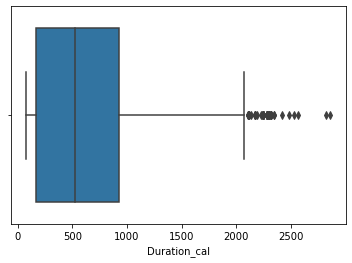

In [306]:
sns.boxplot(x='Duration_cal',data=df1_train)

we have outliers in the "Duration_cal" which was total duration (in minutes)

By IQR(Inter quartile range) Method

In [307]:
IQR=describe['Duration_cal']['75%']-describe['Duration_cal']['25%']
lower_limit=describe['Duration_cal']['25%']-1.5*IQR
upper_limit=describe['Duration_cal']['75%']+1.5*IQR

In [308]:
df1_train=df1_train[(df1_train['Duration_cal']>lower_limit) & (df1_train['Duration_cal']<upper_limit)]

# Feature selection of columns using correlation 

In [309]:
corr=df1_train.corr()

<AxesSubplot:>

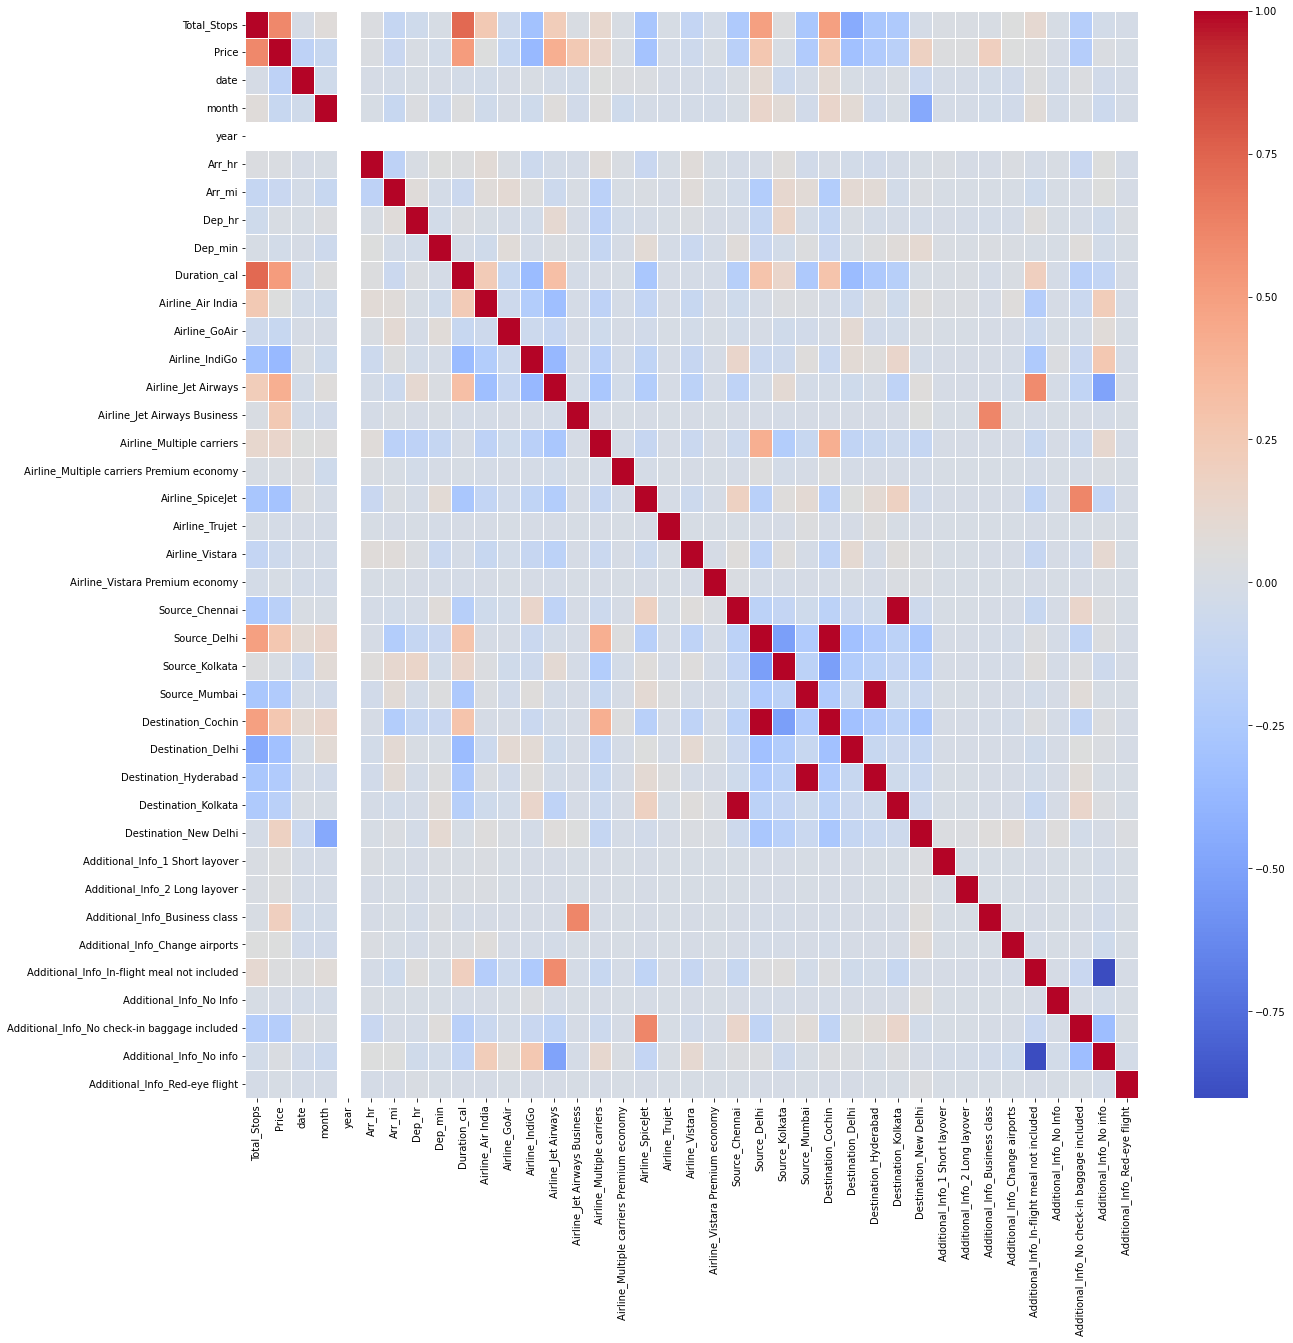

In [310]:
plt.figure(figsize=(20,20))
sns.heatmap(data=corr,linewidths=0.5,cmap='coolwarm')

In [311]:
df1_train.drop('year',axis=1,inplace=True)

In [312]:
df1_test=df[df['Price'].isnull()]

In [313]:
df1_test

,Total_Stops,Price,date,month,year,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,1,NaN,6,6,2019,4,25,17,30,655,...,0,0,0,0,0,0,0,0,1,0
1,1,NaN,12,5,2019,10,20,6,20,240,...,0,0,0,0,0,0,0,0,1,0
2,1,NaN,21,5,2019,19,0,19,15,1425,...,0,0,0,0,0,1,0,0,0,0
3,1,NaN,21,5,2019,21,0,8,0,780,...,0,0,0,0,0,0,0,0,1,0
4,0,NaN,24,6,2019,2,45,23,55,170,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,NaN,6,6,2019,20,25,20,30,1435,...,0,0,0,0,0,0,0,0,1,0
2667,0,NaN,27,3,2019,16,55,14,20,155,...,0,0,0,0,0,0,0,0,1,0
2668,1,NaN,6,3,2019,4,25,21,50,395,...,0,0,0,0,0,0,0,0,1,0
2669,1,NaN,6,3,2019,19,15,4,0,915,...,0,0,0,0,0,0,0,0,1,0


In [314]:
T=df1_test.drop(['Price','year'],axis=1)

In [315]:
T

,Total_Stops,date,month,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal,Airline_Air India,Airline_GoAir,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,1,6,6,4,25,17,30,655,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,12,5,10,20,6,20,240,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,21,5,19,0,19,15,1425,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,780,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,24,6,2,45,23,55,170,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,25,20,30,1435,1,0,...,0,0,0,0,0,0,0,0,1,0
2667,0,27,3,16,55,14,20,155,0,0,...,0,0,0,0,0,0,0,0,1,0
2668,1,6,3,4,25,21,50,395,0,0,...,0,0,0,0,0,0,0,0,1,0
2669,1,6,3,19,15,4,0,915,1,0,...,0,0,0,0,0,0,0,0,1,0


In [316]:
X=df1_train.drop('Price',axis=1)
X

,Total_Stops,date,month,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal,Airline_Air India,Airline_GoAir,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,24,3,1,10,22,20,170,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2,1,5,13,15,5,50,445,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2,9,6,4,25,9,25,1140,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,12,5,23,30,18,5,325,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,3,21,35,16,50,285,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,22,25,19,55,150,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,0,27,4,23,20,20,45,155,1,0,...,0,0,0,0,0,0,0,0,1,0
10680,0,27,4,11,20,8,20,180,0,0,...,0,0,0,0,0,0,0,0,1,0
10681,0,1,3,14,10,11,30,160,0,0,...,1,0,0,0,0,0,0,0,1,0


In [317]:
y=df1_train['Price']

In [318]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10606, dtype: float64

# Feature Scaling the train dataset 

# Standardization

In [319]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(X)

In [320]:
X_scaled=pd.DataFrame(data=scaled_data,columns=X.columns)

In [321]:
X_scaled

,Total_Stops,date,month,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal,Airline_Air India,Airline_GoAir,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,-1.221899,1.237124,-1.477705,-1.794797,-0.889329,1.648921,-0.235780,-0.940948,-0.436748,-0.1365,...,3.238949,-0.009711,-0.009711,-0.019424,-0.025699,-0.478209,-0.016821,-0.176381,0.530601,-0.009711
1,1.779714,-1.476568,0.244741,-0.045736,-0.586626,-1.311741,1.363292,-0.380287,2.289650,-0.1365,...,-0.308742,-0.009711,-0.009711,-0.019424,-0.025699,-0.478209,-0.016821,-0.176381,0.530601,-0.009711
2,1.779714,-0.532675,1.105964,-1.357532,0.018780,-0.615115,0.030732,1.036656,-0.436748,-0.1365,...,-0.308742,-0.009711,-0.009711,-0.019424,-0.025699,-0.478209,-0.016821,-0.176381,0.530601,-0.009711
3,0.278907,-0.178715,0.244741,1.411816,0.321483,0.952295,-1.035316,-0.624939,-0.436748,-0.1365,...,-0.308742,-0.009711,-0.009711,-0.019424,-0.025699,-0.478209,-0.016821,-0.176381,0.530601,-0.009711
4,0.278907,-1.476568,-1.477705,1.120305,0.624186,0.603982,1.363292,-0.706489,-0.436748,-0.1365,...,3.238949,-0.009711,-0.009711,-0.019424,-0.025699,-0.478209,-0.016821,-0.176381,0.530601,-0.009711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10601,-1.221899,-0.532675,-0.616482,1.266060,0.018780,1.126451,1.629804,-0.981723,-0.436748,-0.1365,...,-0.308742,-0.009711,-0.009711,-0.019424,-0.025699,-0.478209,-0.016821,-0.176381,0.530601,-0.009711
10602,-1.221899,1.591084,-0.616482,1.411816,-0.283923,1.300608,1.096780,-0.971529,2.289650,-0.1365,...,-0.308742,-0.009711,-0.009711,-0.019424,-0.025699,-0.478209,-0.016821,-0.176381,0.530601,-0.009711
10603,-1.221899,1.591084,-0.616482,-0.337246,-0.283923,-0.789271,-0.235780,-0.920560,-0.436748,-0.1365,...,-0.308742,-0.009711,-0.009711,-0.019424,-0.025699,-0.478209,-0.016821,-0.176381,0.530601,-0.009711
10604,-1.221899,-1.476568,-1.477705,0.100019,-0.889329,-0.266802,0.297244,-0.961335,-0.436748,-0.1365,...,3.238949,-0.009711,-0.009711,-0.019424,-0.025699,-0.478209,-0.016821,-0.176381,0.530601,-0.009711


# Train test split

In [322]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.33,random_state=42)

# Rigid Regressor

In [323]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
r=Ridge()
param={'alpha':[1e-15,1e-10,1e-8,1e-2,1e-3,1,5,10,20]}
gs=GridSearchCV(r,param,scoring='neg_mean_squared_error',cv=5)
gs.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 0.001, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [324]:
y_pred=gs.predict(X_test)

In [325]:
y_pred

array([13585.57130682,  4451.99242353,  9822.03301472, ...,
        4145.14751256, 11340.91466733, 15746.31049879])

Model evaluation score(R2_score)

In [326]:
from sklearn.metrics import r2_score

In [327]:
rgs=r2_score(y_pred,y_test)

In [328]:
rgs

0.595098332023525

R2_score of rigid_regressor is 0.53

# Random Forest Regressor

We do not have to do Standardization in Random forest 

In [329]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [330]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [331]:
rf_pred=rf.predict(X_test)

In [332]:
rf_pred

array([12284.09      ,  3898.64      , 10237.67      , ...,
        5242.64      , 10148.21666667, 15176.25      ])

In [333]:
rf_scr=r2_score(rf_pred,y_test)

In [334]:
rf_scr

0.8852469295414508

R2_score of random_forest_regressor is 0.88

# So we predict the test data with Random forest regressor

In [335]:
T['Price']=rf.predict(T)

In [336]:
T

,Total_Stops,date,month,Arr_hr,Arr_mi,Dep_hr,Dep_min,Duration_cal,Airline_Air India,Airline_GoAir,...,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Price
0,1,6,6,4,25,17,30,655,0,0,...,0,0,0,0,0,0,0,1,0,14697.000
1,1,12,5,10,20,6,20,240,0,0,...,0,0,0,0,0,0,0,1,0,4356.060
2,1,21,5,19,0,19,15,1425,0,0,...,0,0,0,0,1,0,0,0,0,12898.000
3,1,21,5,21,0,8,0,780,0,0,...,0,0,0,0,0,0,0,1,0,12003.055
4,0,24,6,2,45,23,55,170,0,0,...,0,0,0,0,0,0,0,1,0,3871.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,25,20,30,1435,1,0,...,0,0,0,0,0,0,0,1,0,10220.670
2667,0,27,3,16,55,14,20,155,0,0,...,0,0,0,0,0,0,0,1,0,4188.490
2668,1,6,3,4,25,21,50,395,0,0,...,0,0,0,0,0,0,0,1,0,15564.010
2669,1,6,3,19,15,4,0,915,1,0,...,0,0,0,0,0,0,0,1,0,14208.070


In [338]:
df_test['Price']=T['Price']

In [340]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,14697.000
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4356.060
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,12898.000
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,12003.055
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,3871.950
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,10220.670
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,4188.490
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,15564.010
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,14208.070
